In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a path
path = r'C:\Users\Asus-Pc\Desktop\CareerFoundry\Data Analytics Immersion\6. Advanced Analytics & Dashboard Design\Task 6.1 - Sourcing Open Data\UFC fight historical data 1993-2021'

In [4]:
# Import preprocessed_data.csv
df_ufc = pd.read_csv(os.path.join(path, 'preprocessed_data.csv'), index_col = False)

4.
Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

Since the hypothesis layed out previously regarded volume of strikes and wins, I will look for these variables on which I want to test the existing relationship between them. Moreover, another relationship I'd like to test is the one between knockdowns and takedowns and wins.

# Looking for relationships for red corner.

Looking for a relationship between "Wins" and "Average total strikes landed".

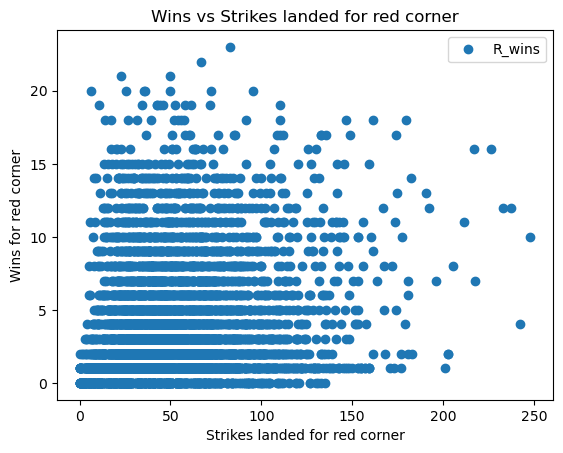

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ufc.plot(x = 'R_avg_TOTAL_STR_landed', y='R_wins',style='o') 
plt.title('Wins vs Strikes landed for red corner')  
plt.xlabel('Strikes landed for red corner')  
plt.ylabel('Wins for red corner')  
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ufc['R_avg_TOTAL_STR_landed'].values.reshape(-1,1)
y = df_ufc['R_wins'].values.reshape(-1,1)

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
# Create a regression object.

regression = LinearRegression()

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

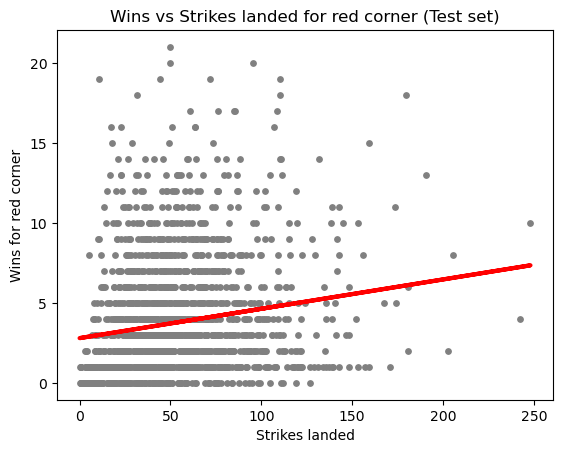

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Wins vs Strikes landed for red corner (Test set)')
plot_test.xlabel('Strikes landed')
plot_test.ylabel('Wins for red corner')
plot_test.show()

The regression line for the test set has a slightly positive slope, which seems to confirm our hypothesis that there's a linear relationship (despite small) between wins and strikes landed. We have to check if this is true. 

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [42]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01834154]]
Mean squared error:  13.65634133954494
R2 score:  0.029555282339019828


The slope is slightly positive as noticed before, but the mean squared error is fairly big, meaning that the regression line isn't very close to the set of points, hence the regression line isn't an accurate representation of the data. Moreover, the r-squared value is almost 0, meaning that the model does a poor job explaining the data variance.

In [43]:
y_predicted

array([[4.84007034],
       [3.29479592],
       [3.99091453],
       ...,
       [2.9829898 ],
       [3.235757  ],
       [3.77970028]])

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,4.840070
1,0,3.294796
2,5,3.990915
3,5,3.846332
4,2,4.184360
5,0,3.551577
6,0,3.689963
7,12,3.755928
8,2,3.368162
9,0,3.689963


The predicted y values differ greatly from the actual y values. This is another proof that the model isn't doing a great job explaining the relationship between the “Wins” and “Significant strikes landed” variables.

In [45]:
# Predict

y_predicted_train = regression.predict(X_train)

In [46]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01834154]]
Mean squared error:  14.91179437664251
R2 score:  0.01994687509491455


The mean squared error and R2 score values are similar to those obtained in the test set, hence we cannot expect a better result compared to the one obtained before.

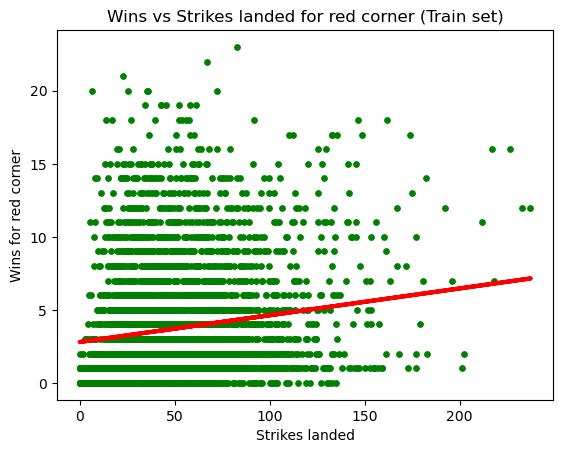

In [48]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins vs Strikes landed for red corner (Train set)')
plot_test.xlabel('Strikes landed')
plot_test.ylabel('Wins for red corner')
plot_test.show()

The plot confirms a great variance in data points for the test set as well as the training one. We can confirm the inaccuracy of our model and assert that the linear relationship fails to explain the relationship between "Wins" and "Strikes landed". This means that the statement "the more strikes a fighter lands, the higher are the chances to win" is only partially true. 

Looking for a relationship between "Wins" and "Average number of knockdowns".

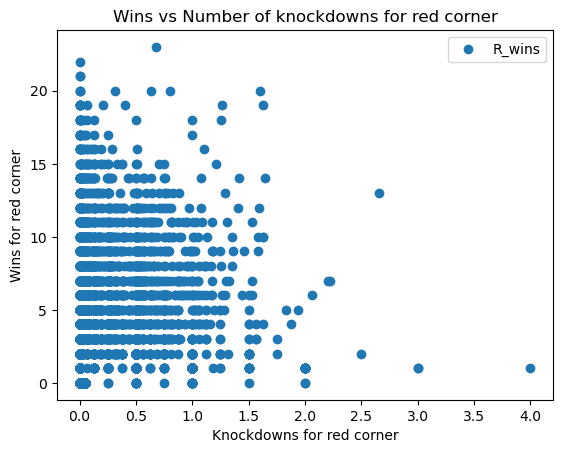

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ufc.plot(x = 'R_avg_KD', y='R_wins',style='o') 
plt.title('Wins vs Number of knockdowns for red corner')  
plt.xlabel('Knockdowns for red corner')  
plt.ylabel('Wins for red corner')  
plt.show()

In [6]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ufc['R_avg_KD'].values.reshape(-1,1)
y = df_ufc['R_wins'].values.reshape(-1,1)

In [7]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Create a regression object.

regression = LinearRegression()

In [9]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

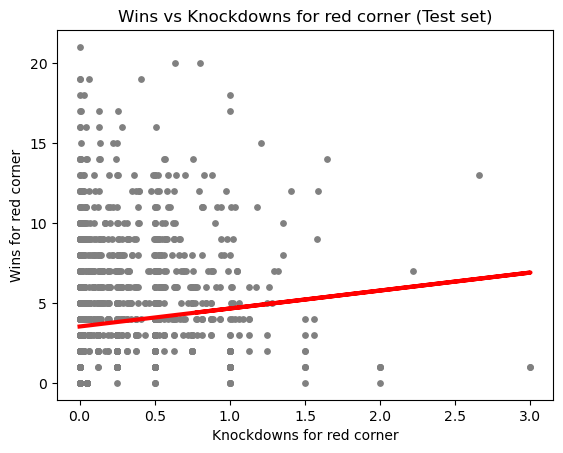

In [11]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Wins vs Knockdowns for red corner (Test set)')
plot_test.xlabel('Knockdowns for red corner')
plot_test.ylabel('Wins for red corner')
plot_test.show()

In [12]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [13]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.12415635]]
Mean squared error:  13.67094776693577
R2 score:  0.028517322760176822


As before, the slope is slightly positive, but the mean squared error is fairly big, meaning that the regression line isn't very close to the set of points, hence the regression line isn't an accurate representation of the data. Moreover, the r-squared value is almost 0, meaning that the model does a poor job explaining the data variance.

In [14]:
y_predicted

array([[3.52645584],
       [3.52645584],
       [3.80749493],
       ...,
       [4.08853402],
       [4.20004739],
       [4.40470299]])

In [15]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,3.526456
1,0,3.526456
2,5,3.807495
3,5,3.535238
4,2,3.526456
5,0,4.650612
6,0,3.579480
7,12,4.233583
8,2,3.526456
9,0,3.579480


The predicted y values differ greatly from the actual y values. This is another proof that the model isn't doing a great job explaining the relationship between the “Wins” and “Knockdowns for red corner” variables.

In [16]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [17]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [18]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.12415635]]
Mean squared error:  15.065120357966038
R2 score:  0.009869777508279554


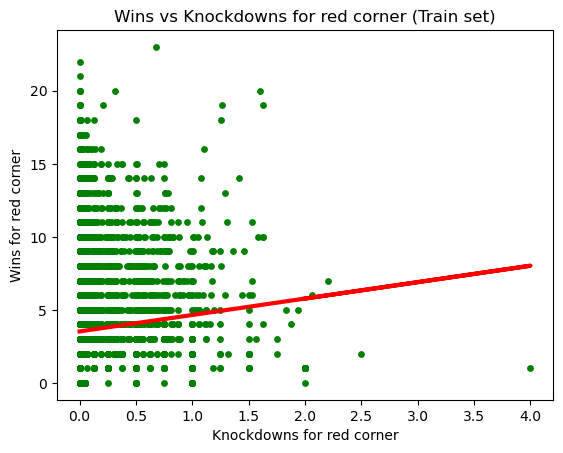

In [19]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins vs Knockdowns for red corner (Train set)')
plot_test.xlabel('Knockdowns for red corner')
plot_test.ylabel('Wins for red corner')
plot_test.show()

The plot confirms a great variance in data points for the test set as well as the training one. We can confirm the inaccuracy of our model and assert that the linear relationship fails to explain the relationship between "Wins" and "Knockdowns obtained". This means that the statement "the more knockdowns a fighter obtains, the higher are the chances to win" is only partially true. 

Looking for a relationship between "Wins" and "Average takedown percentage".

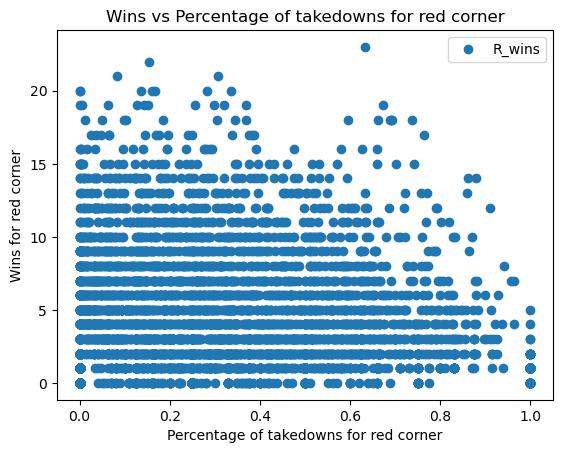

In [64]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ufc.plot(x = 'R_avg_TD_pct', y='R_wins',style='o') 
plt.title('Wins vs Percentage of takedowns for red corner')  
plt.xlabel('Percentage of takedowns for red corner')  
plt.ylabel('Wins for red corner')  
plt.show()

In [65]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ufc['R_avg_TD_pct'].values.reshape(-1,1)
y = df_ufc['R_wins'].values.reshape(-1,1)

In [66]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
# Create a regression object.

regression = LinearRegression()

In [68]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

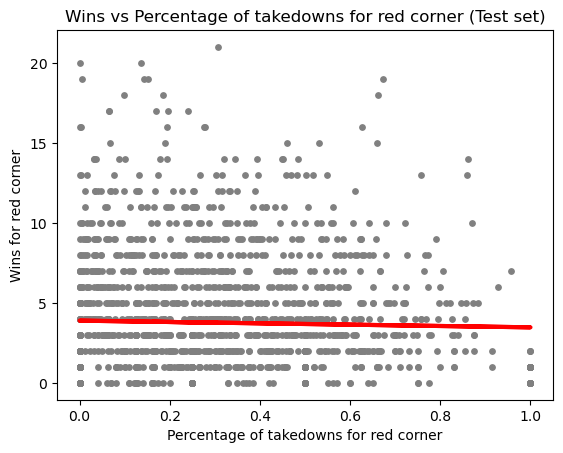

In [70]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Wins vs Percentage of takedowns for red corner (Test set)')
plot_test.xlabel('Percentage of takedowns for red corner')
plot_test.ylabel('Wins for red corner')
plot_test.show()

In [71]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [72]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.41889078]]
Mean squared error:  14.084398755724564
R2 score:  -0.0008632644780712795


The slope is negative, but almost 0: this means that, as the average percentage of takedowns rises, the number of wins mildly decreases. The mean squared error isn't particularly big, but neither negligible. This means that the regression line isn't close to the set of points, hence it isn't an accurate representation of the data. The mean squared error is almost 0: another clue that tells us that the model does a poor job at explaining the data variance.

In [73]:
y_predicted

array([[3.76653569],
       [3.83879435],
       [3.5339204 ],
       ...,
       [3.89325015],
       [3.78799694],
       [3.82413317]])

In [74]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,3.766536
1,0,3.838794
2,5,3.533920
3,5,3.862488
4,2,3.600027
5,0,3.893250
6,0,3.788527
7,12,3.887769
8,2,3.788527
9,0,3.788527


The predicted y values differ from the actual y values. This is another proof that the model isn't doing a great job explaining the relationship between the “Wins” and “Percentage of takedowns for red corner” variables.

In [75]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [76]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [77]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.41889078]]
Mean squared error:  15.204443888742023
R2 score:  0.0007129679211184126


The mean squared error and R2 score values are similar to those obtained in the test set, hence we cannot expect a better result compared to the one obtained before.

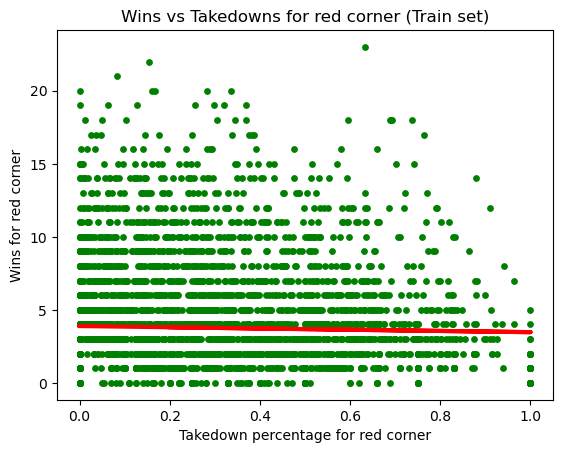

In [78]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins vs Takedowns for red corner (Train set)')
plot_test.xlabel('Takedown percentage for red corner')
plot_test.ylabel('Wins for red corner')
plot_test.show()

The plot confirms a great variance in data points for the test set as well as the training one. We can confirm the inaccuracy of our model and assert that the linear relationship fails to explain the relationship between "Wins" and "Takedowns obtained". We can quite safely say that, regarding the red corner, increasing the takedown percentage, the chances of winning remain almost the same, or even decrease slightly.

# Looking for relationships for blue corner.

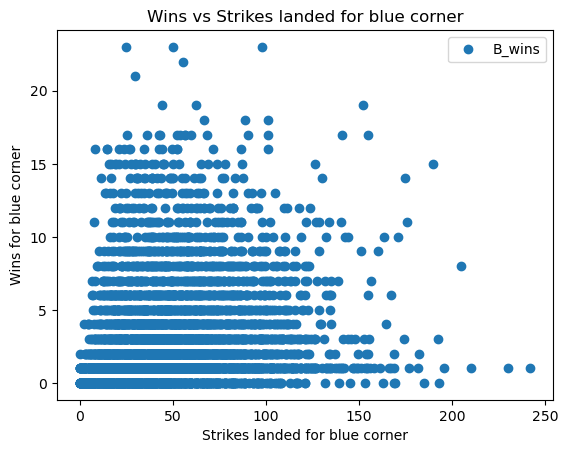

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ufc.plot(x = 'B_avg_TOTAL_STR_landed', y='B_wins',style='o') 
plt.title('Wins vs Strikes landed for blue corner')  
plt.xlabel('Strikes landed for blue corner')  
plt.ylabel('Wins for blue corner')  
plt.show()


In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ufc['B_avg_TOTAL_STR_landed'].values.reshape(-1,1)
y = df_ufc['B_wins'].values.reshape(-1,1)


In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# Create a regression object.

regression = LinearRegression()

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

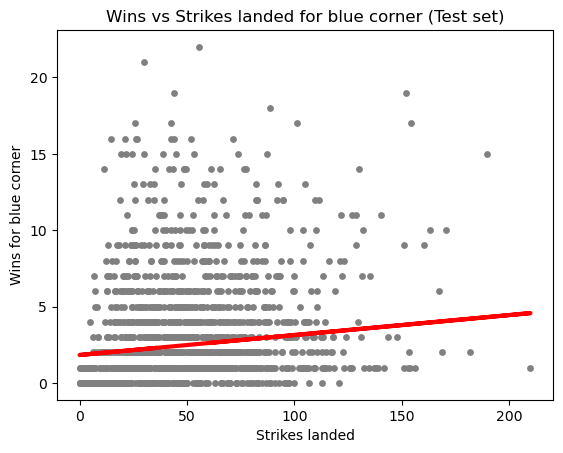

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Wins vs Strikes landed for blue corner (Test set)')
plot_test.xlabel('Strikes landed')
plot_test.ylabel('Wins for blue corner')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [43]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01306606]]
Mean squared error:  12.192287087523985
R2 score:  0.015317651712003277


The slope is slightly positive, but the mean squared error is fairly big, meaning that the regression line isn't very close to the set of points, hence the regression line isn't an accurate representation of the data. Moreover, the r-squared value is almost 0, meaning that the model does a poor job explaining the data variance.

In [44]:
y_predicted

array([[2.28463099],
       [2.06250803],
       [2.29769705],
       ...,
       [2.36547721],
       [2.56718446],
       [2.61781543]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,2.284631
1,2,2.062508
2,3,2.297697
3,1,2.885670
4,6,2.662318
5,0,2.454490
6,0,2.454490
7,2,2.493688
8,2,2.149071
9,0,2.454490


The predicted y values differ substantially from the actual y values. This is another proof that the model isn't doing a great job explaining the relationship between the “Wins” and “Strikes landed for blue corner” variables.

In [46]:
# Predict

y_predicted_train = regression.predict(X_train)

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01306606]]
Mean squared error:  10.155043157078723
R2 score:  0.01285239303544583


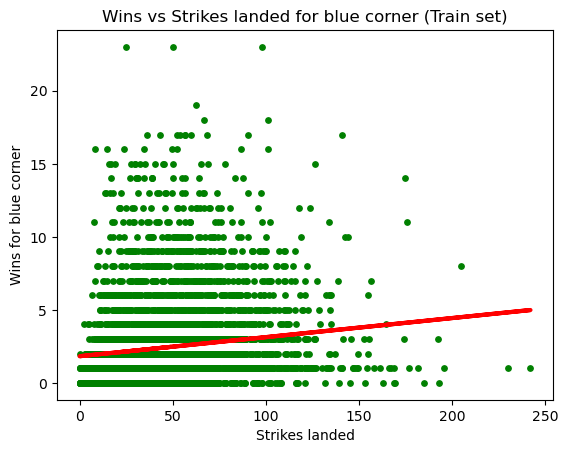

In [48]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins vs Strikes landed for blue corner (Train set)')
plot_test.xlabel('Strikes landed')
plot_test.ylabel('Wins for blue corner')
plot_test.show()


The plot confirms a great variance in data points for the test set as well as the training one. We can confirm the inaccuracy of our model and assert that the linear relationship fails to explain the relationship between "Wins" and "Strikes landed". This means that the statement "the more strikes a fighter lands, the higher are the chances to win" is only partially true.

Looking for a relationship between "Wins" and "Average number of knockdowns".

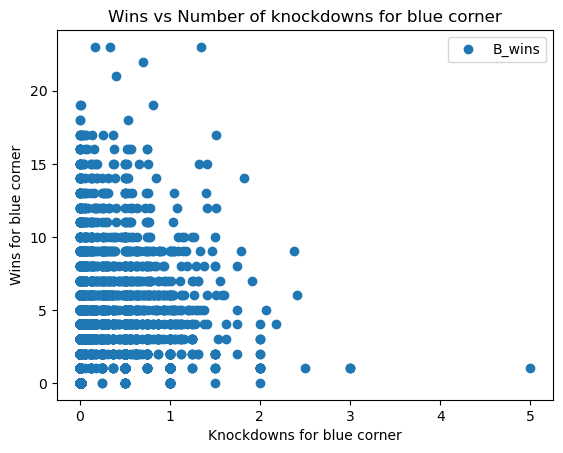

In [50]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ufc.plot(x = 'B_avg_KD', y='B_wins',style='o') 
plt.title('Wins vs Number of knockdowns for blue corner')  
plt.xlabel('Knockdowns for blue corner')  
plt.ylabel('Wins for blue corner')  
plt.show()

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ufc['B_avg_KD'].values.reshape(-1,1)
y = df_ufc['B_wins'].values.reshape(-1,1)

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
# Create a regression object.

regression = LinearRegression()

In [54]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

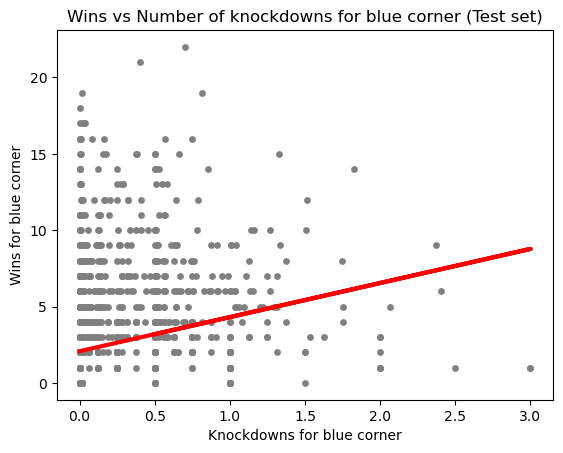

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Wins vs Number of knockdowns for blue corner (Test set)')
plot_test.xlabel('Knockdowns for blue corner')
plot_test.ylabel('Wins for blue corner')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [58]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.23288492]]
Mean squared error:  11.677113972593071
R2 score:  0.05692443712834261


The slope has a positive value: this means that, the number of wins grow with the number of knockdowns obtained. The mean squared error isn't particularly big, but neither negligible. This means that the regression line isn't close to the set of points, hence it isn't an accurate representation of the data. The mean squared error is very low: another clue that tells us that the model does a poor job at explaining the data variance.

In [59]:
y_predicted

array([[2.07712213],
       [2.07712213],
       [2.07712213],
       ...,
       [2.07712213],
       [3.75178582],
       [3.19356459]])

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,2.077122
1,2,2.077122
2,3,2.077122
3,1,6.542892
4,6,2.077122
5,0,2.112011
6,0,2.112011
7,2,2.077122
8,2,2.077122
9,0,2.112011


The predicted y values differ from the actual y values. This is another proof that the model isn't doing a great job explaining the relationship between the “Wins” and “Knockdowns for blue corner” variables.

In [61]:
# Predict

y_predicted_train = regression.predict(X_train)

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [62]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.23288492]]
Mean squared error:  9.719735709568223
R2 score:  0.055167595290819826


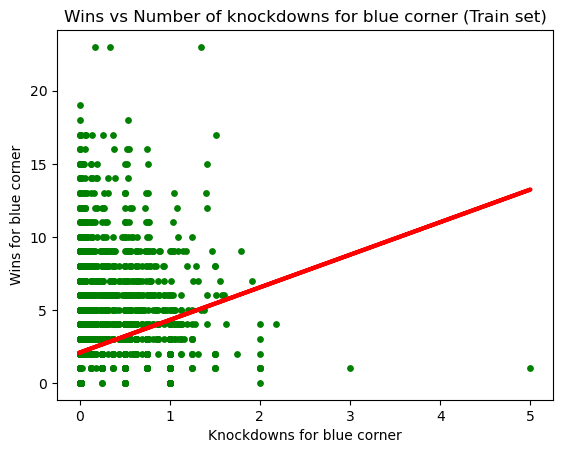

In [63]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins vs Number of knockdowns for blue corner (Train set)')
plot_test.xlabel('Knockdowns for blue corner')
plot_test.ylabel('Wins for blue corner')
plot_test.show()

The plot confirms a great variance in data points for the test set as well as the training one. We can confirm the inaccuracy of our model and assert that the linear relationship fails to fully explain the relationship between "Wins" and "Knockdowns obtained" for blue corner as well. This means that the statement "the more knockdowns a fighter obtains, the higher are the chances to win" is only partially true.

Looking for a relationship between "Wins" and "Average takedown percentage".

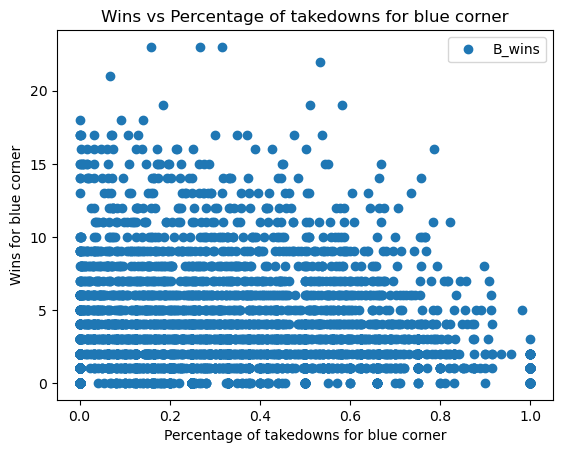

In [85]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_ufc.plot(x = 'B_avg_TD_pct', y='B_wins',style='o') 
plt.title('Wins vs Percentage of takedowns for blue corner')  
plt.xlabel('Percentage of takedowns for blue corner')  
plt.ylabel('Wins for blue corner')  
plt.show()

In [80]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ufc['B_avg_TD_pct'].values.reshape(-1,1)
y = df_ufc['B_wins'].values.reshape(-1,1)

In [81]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
# Create a regression object.

regression = LinearRegression()

In [83]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [84]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

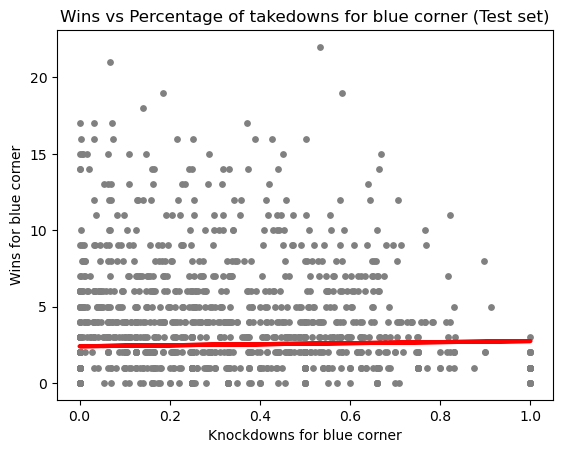

In [86]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Wins vs Percentage of takedowns for blue corner (Test set)')
plot_test.xlabel('Knockdowns for blue corner')
plot_test.ylabel('Wins for blue corner')
plot_test.show()

In [87]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [88]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.34083903]]
Mean squared error:  12.439635538570862
R2 score:  -0.0046588836069085815


Contrary to what happens for fighters in the red corner, the slope is still almost 0, but has a positive value: this means that, as the average percentage of takedowns rises, the number of wins slightly increases. The mean squared error isn't particularly big, but neither negligible. This means that the regression line isn't close to the set of points, hence it isn't an accurate representation of the data. The mean squared error is almost 0 and has a negative value: another clue that tells us that the model does a poor job at explaining the data variance. It also means that the model fits worse than a horizontal line.

In [89]:
y_predicted

array([[2.4176672 ],
       [2.48327872],
       [2.73976009],
       ...,
       [2.53994321],
       [2.63750838],
       [2.55528096]])

In [90]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,2.417667
1,2,2.483279
2,3,2.739760
3,1,2.654550
4,6,2.454276
5,0,2.484131
6,0,2.484131
7,2,2.484131
8,2,2.455159
9,0,2.484131


The predicted y values differ from the actual y values. This is another proof that the model isn't doing a great job explaining the relationship between the “Wins” and “Percentage of Takedowns for blue corner” variables.

In [91]:
# Predict

y_predicted_train = regression.predict(X_train)

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [92]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.34083903]]
Mean squared error:  10.280428515756585
R2 score:  0.000663980356867877


The results for the training set are slightly better than the one obtained previously, but still the model doesn't seem to be working properly.

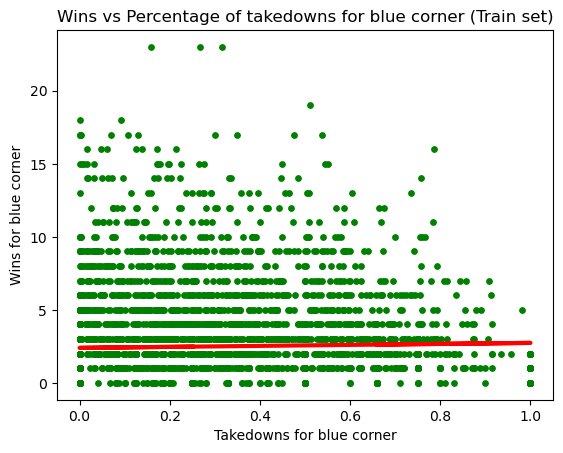

In [94]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins vs Percentage of takedowns for blue corner (Train set)')
plot_test.xlabel('Takedowns for blue corner')
plot_test.ylabel('Wins for blue corner')
plot_test.show()

The plot confirms a great variance in data points for the test set as well as the training one. We can confirm the inaccuracy of our model and assert that the linear relationship fails to explain the relationship between "Wins" and "Takedowns obtained". We can quite safely say that, regarding the blue corner, increasing the takedown percentage, the chances of winning remain almost the same, or increase slightly.

To sum things up, to this point we can say that the model implemented, for both blue and red corners, didn't work properly.  Fighters that land more strikes seem to be gaining a small advantage compared to the ones who place less strikes. The same holds true for knockdowns landed and wins: there seems to be a small positive correlation between the two, although our models aren't really thrustworthy in explaining a relationship that appears to be more complicated than a linear one.

Something that differs from blue and red corners, is the relationship between wins and percentages of takedowns: there isn't a strong relationship for both, but it is slightly negative for the red corner and slightly positive for the blue one. This difference might be explored in the future.